### Import Data 

In [212]:

%pip install pandas
import pandas as pd 

med_insurance_df = pd.read_csv('medical_insurance_cost.csv')
print(med_insurance_df.head())

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Step 2 Check for Nulls

In [213]:

print(med_insurance_df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [214]:
duplicates = med_insurance_df[med_insurance_df.duplicated(keep=False)]
print(duplicates)


     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


## Step 3 Determine Outliers 

In [215]:
med_insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## One Hot Encoding

In [216]:
%pip install scikit-learn

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder = OneHotEncoder(drop="first", sparse_output=True)

categorical_variables = ['sex', 'smoker', 'region']
med_insurance_df_categories = med_insurance_df[categorical_variables]

med_insurance_df_encoded = encoder.fit_transform(med_insurance_df_categories)
med_insurance_df_encoded = pd.DataFrame(med_insurance_df_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_variables))

#med_insurance_df_encoded = med_insurance_df_encoded.drop(columns='sex_female','smoker_no')

print(med_insurance_df_encoded.head())




Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
   sex_male  smoker_yes  region_northwest  region_southeast  region_southwest
0       0.0         1.0               0.0               0.0               1.0
1       1.0         0.0               0.0               1.0               0.0
2       1.0         0.0               0.0               1.0               0.0
3       1.0         0.0               1.0               0.0               0.0
4       1.0         0.0               1.0               0.0               0.0


### 4. Merge DF with ONE HOT ENCODING DF

In [217]:

#med_insurance_df = med_insurance_df.drop(columns=med_insurance_df_categories)
med_insurance_df_one_hot = pd.concat([med_insurance_df, med_insurance_df_encoded], axis=1)

print(med_insurance_df_one_hot)

      age     sex     bmi  children smoker     region      charges  sex_male  \
0      19  female  27.900         0    yes  southwest  16884.92400       0.0   
1      18    male  33.770         1     no  southeast   1725.55230       1.0   
2      28    male  33.000         3     no  southeast   4449.46200       1.0   
3      33    male  22.705         0     no  northwest  21984.47061       1.0   
4      32    male  28.880         0     no  northwest   3866.85520       1.0   
...   ...     ...     ...       ...    ...        ...          ...       ...   
1333   50    male  30.970         3     no  northwest  10600.54830       1.0   
1334   18  female  31.920         0     no  northeast   2205.98080       0.0   
1335   18  female  36.850         0     no  southeast   1629.83350       0.0   
1336   21  female  25.800         0     no  southwest   2007.94500       0.0   
1337   61  female  29.070         0    yes  northwest  29141.36030       0.0   

      smoker_yes  region_northwest  reg

### 5. Features Testing

In [218]:
med_insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


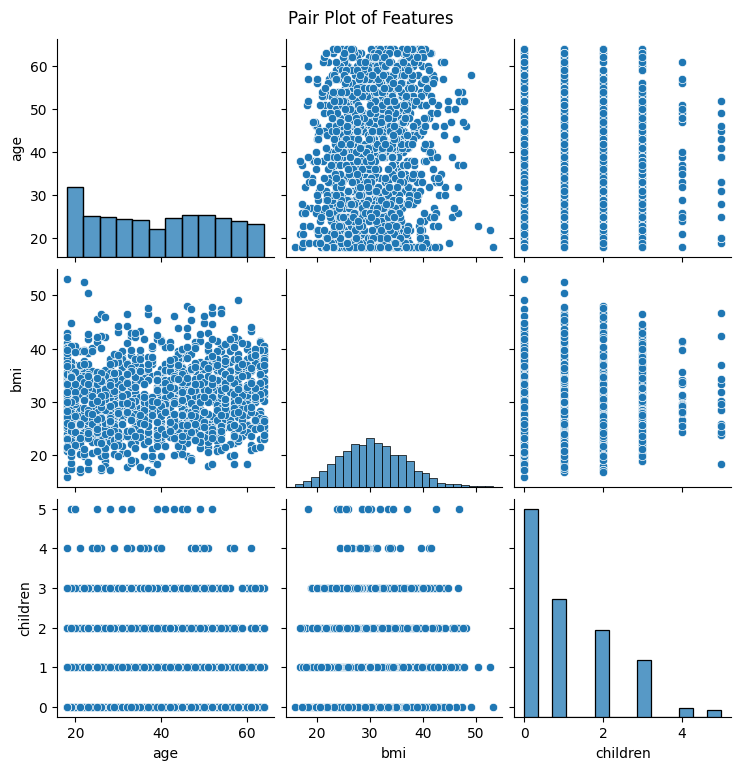

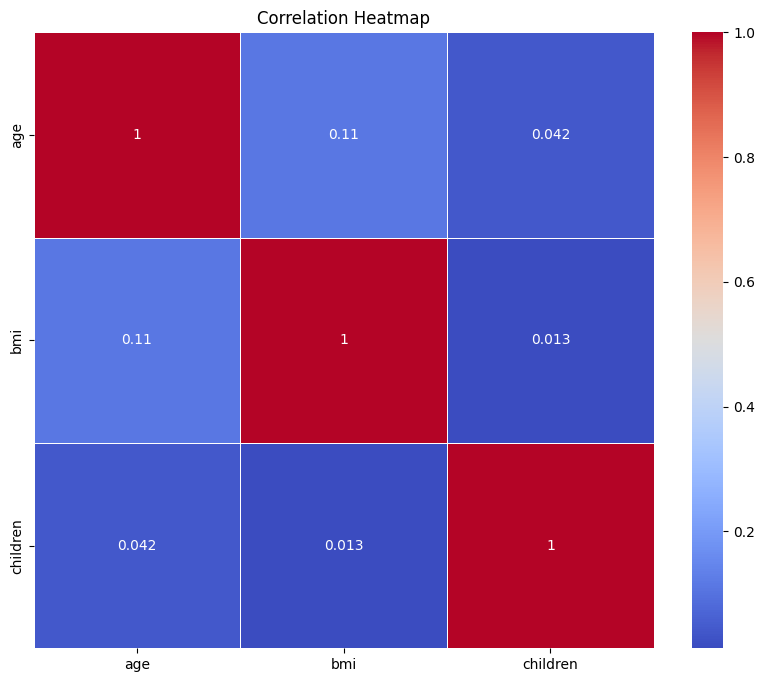

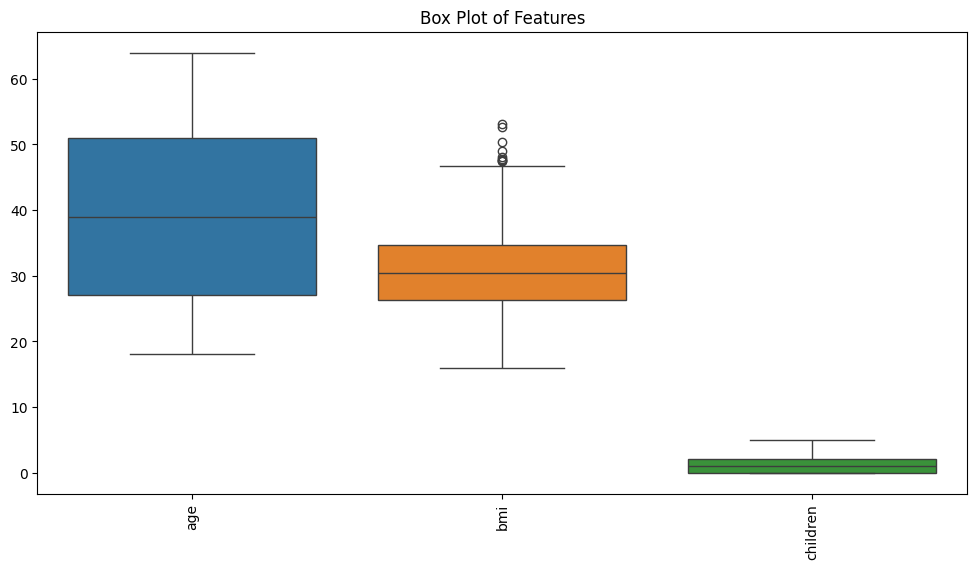

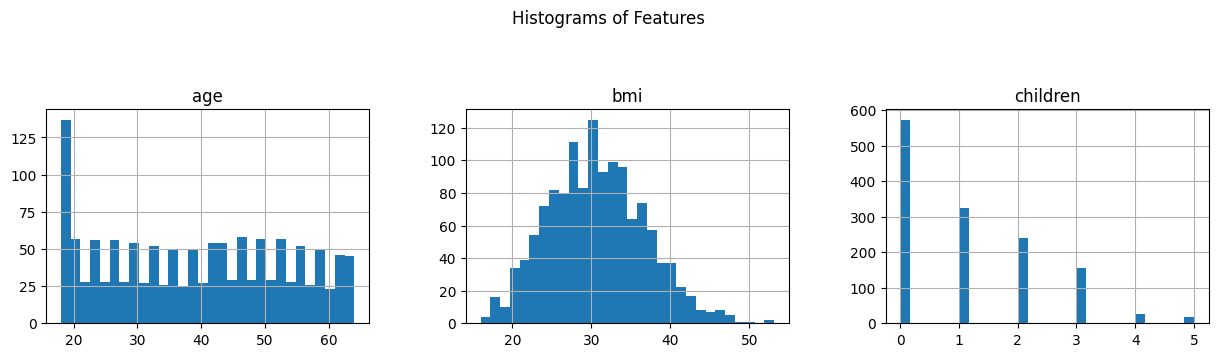

In [219]:
%pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming med_insurance_df is already defined and loaded with data\\
feature_values = ['age', 'bmi', 'children']
feature_df = med_insurance_df[feature_values]


# 1. Pair Plot
sns.pairplot(feature_df)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = feature_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=feature_df)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

# 4. Histogram
feature_df.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Features')
plt.show()

## 7. Test Train Split

In [220]:

import seaborn as sns
from sklearn.model_selection import train_test_split

X = med_insurance_df_one_hot.drop(columns='charges')
y = med_insurance_df_one_hot['charges']

# We divide the sample into train and test at 80%
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)

# train_data_med_insurance = pd.concat([X_train, y_train], axis=1)
# test_data_med_insurance = pd.concat([X_train, y_train], axis=1)


print(y_train.head())

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64


## 6. Feature Scaling 

In [221]:
from sklearn.preprocessing import StandardScaler


# Scale the Training Data
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


X_train_scaled[feature_values] = scaler.fit_transform(X_train[feature_values])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()


# Scale the Test Data
X_test_scaled[feature_values] = scaler.fit_transform(X_test[feature_values])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)




In [222]:
X_train_scaled_df = X_train_scaled_df.drop(columns=categorical_variables)
X_test_scaled_df = X_test_scaled_df.drop(columns=categorical_variables)

X_train_scaled_df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,0.0,0.0,1.0,0.0,0.0
1285,0.543313,-1.033082,-0.911192,0.0,0.0,0.0,0.0,0.0
1142,0.898745,-0.943687,-0.911192,0.0,0.0,0.0,1.0,0.0
969,-0.025379,0.622393,3.202629,0.0,0.0,0.0,1.0,0.0
486,1.040918,-1.504893,1.557100,0.0,0.0,1.0,0.0,0.0


In [223]:

# train_df = pd.concat([X_train_scaled_df.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
# train_df = train_df.drop(columns='charges')
# test_df = pd.concat([scaled_numerical_df.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
# test_df
# test_df.head()
#print(train_df.head())
# train_df.to_csv('train_data.csv', index=False)
# test_df.to_csv('test_data.csv', index=False)



## 8. Linear Regression

In [224]:
import pandas as pd


test_data = pd.read_csv('train_data.csv')
train_data = pd.read_csv('test_data.csv')

#est_data.head()
train_data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,45,25.175,2,0.0,0.0,0.0,0.0,0.0,9095.06825
1,36,30.020,0,0.0,0.0,1.0,0.0,0.0,5272.17580
2,64,26.885,0,0.0,1.0,1.0,0.0,0.0,29330.98315
3,46,25.745,3,1.0,0.0,1.0,0.0,0.0,9301.89355
4,19,31.920,0,1.0,1.0,1.0,0.0,0.0,33750.29180


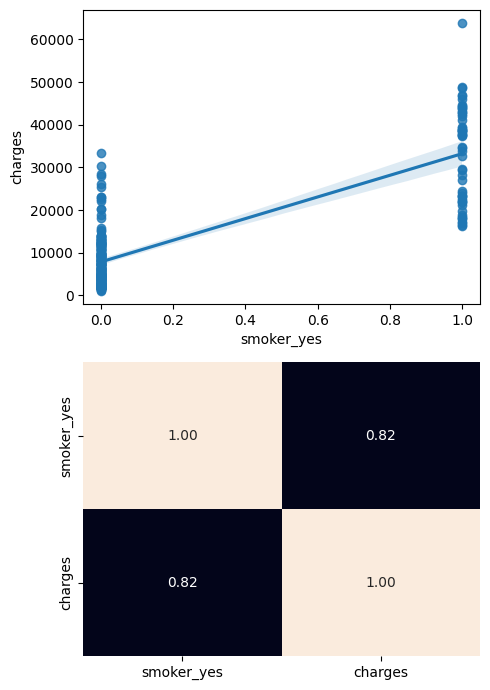

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = total_data, x = "smoker_yes", y = "charges")
sns.heatmap(total_data[["smoker_yes", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

### Test Train pt 2

In [228]:
from sklearn.linear_model import LinearRegression

# Ensure y_train is used instead of y to match the number of samples in X_train_scaled_df
model = LinearRegression()
model.fit(X_train_scaled_df, y_train)


LinearRegression()

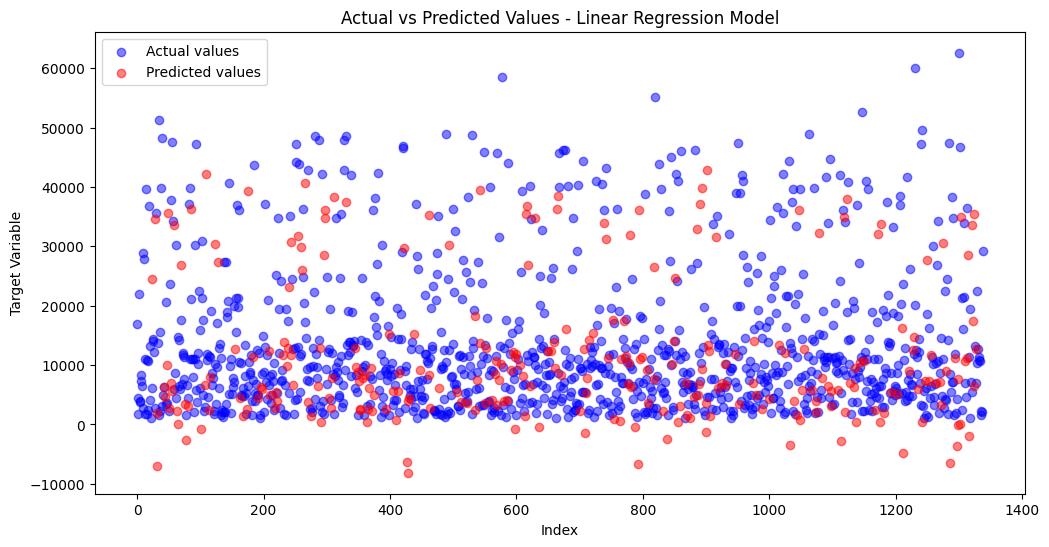

In [244]:
y_pred = model.predict(X_test_scaled_df)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X_train_scaled_df.index, y_train, color='b', alpha=0.5, label='Actual values')
plt.scatter(X_test_scaled_df.index, y_pred, color='r', alpha=0.5, label='Predicted values')
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted Values - Linear Regression Model')
plt.legend()
plt.show()

### Residuals 

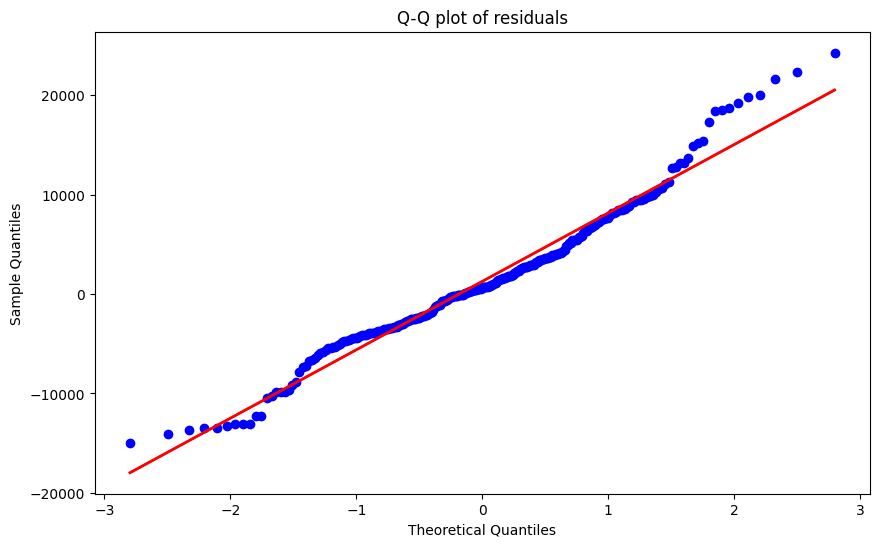

In [246]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(10, 6))

residuals = y_test - y_pred
# Calculate the theoretical quantiles
(quantiles, values), (slope, intercept, r) = stats.probplot(residuals, dist="norm", plot=ax)

# Add the line representing perfect normal distribution
ax.plot(quantiles, quantiles * slope + intercept, linewidth=2, color='r')

ax.set_title("Q-Q plot of residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

plt.show()

### Metrics

In [248]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 49429304.5424489
R-squared (R2): 0.6816121840900959


In [237]:
#%pip install statsmodels

import statsmodels.api as sm

model = sm.OLS(y_train, X_train_scaled_df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              687.1
Date:                Wed, 09 Oct 2024   Prob (F-statistic):                        0.00
Time:                        21:47:44   Log-Likelihood:                         -11026.
No. Observations:                1070   AIC:                                  2.207e+04
Df Residuals:                    1062   BIC:                                  2.211e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [243]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

33585879.168265626


### Ridge Regression to Reduce Feature Relevance 

In [254]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

ridge_scores = cross_val_score(Ridge(alpha=1.0), X_train_scaled_df, y_train, cv=5)
print("Ridge CV score:", ridge_scores.mean())

Ridge CV score: 0.7331521431579194


In [255]:
# Lasso
lasso_scores = cross_val_score(Lasso(alpha=1.0), X_train_scaled_df, y_train, cv=5)
print("Lasso CV score:", lasso_scores.mean())



Lasso CV score: 0.7331273763184178


In [256]:
# Elastic Net
elastic_net_scores = cross_val_score(ElasticNet(alpha=1.0, l1_ratio=0.5), X_train_scaled_df, y_train, cv=5)
print("Elastic Net CV score:", elastic_net_scores.mean())

Elastic Net CV score: 0.3641194773443436


In [258]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# For Elastic Net
param_grid = {
    'alpha': np.logspace(-4, 1, 30),
    'l1_ratio': np.linspace(0.1, 1.0, 10)
}
elastic_net = GridSearchCV(ElasticNet(), param_grid, cv=5)
elastic_net.fit(X_train_scaled_df, y_train)

print("Best parameters:", elastic_net.best_params_)
print("Best score:", elastic_net.best_score_)

Best parameters: {'alpha': np.float64(10.0), 'l1_ratio': np.float64(1.0)}
Best score: 0.7332893918310754


In [259]:
# Elastic Net
elastic_net_scores = cross_val_score(ElasticNet(alpha=10.0, l1_ratio=1.0), X_train_scaled_df, y_train, cv=5)
print("Elastic Net CV score:", elastic_net_scores.mean())

Elastic Net CV score: 0.7332893918310754
